In [156]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns
import blocksnet as bn
import pyarrow.parquet as pq
import os
from blocksnet.preprocessing import DataGetter, AggregateParameters
import networkit as nk
from numpy import load
from shapely import Point, LineString

In [157]:
G = ox.load_graphml("C:/Рабочий стол/Dataset_Traffic/drive.graphml")
node_vo, edges_vo = ox.graph_to_gdfs(G)

In [159]:
def result_all_street(hours, speeds, speeds_pred, title):
    pd_data = pd.DataFrame(columns=['date', 'speed'])
    pd_pred = pd.DataFrame(columns=['date', 'speed'])
    s_data = []
    s_pred = []
    t = []
    error = []
    for i in range(len(speeds_pred)):
        s1 = 0
        s2 = 0
        for j in range(len(speeds_pred[0][0])):
            s1+=speeds[-len(speeds_pred)+i][j]
            s2+=speeds_pred[i//hours][i%hours][street]
        s_data.append(s1/len(speeds_pred[0][0]))
        s_pred.append(s2/len(speeds_pred[0][0]))
        error.append(float(abs(s1/len(speeds_pred[0][0]) - s2/len(speeds_pred[0][0]))))
        t.append(c[i])
    pd_data['speed'] = s_data
    pd_pred['speed'] = s_pred
    pd_data['date'] = t
    pd_pred['date'] = t
    pd_data = pd_data.set_index('date')
    pd_pred = pd_pred.set_index('date')
    plt.figure(figsize=(25, 7))
    plt.title(title)
    plt.plot(pd_data)
    plt.plot(pd_pred)
    plt.legend(["True", "Predicted"], loc="center right")
    print(sum(error)/len(speeds_pred))

In [197]:
def result_all_street_vyres_15(hours, speeds, speeds_pred, title):
    pd_data = pd.DataFrame(columns=['date', 'speed'])
    pd_pred = pd.DataFrame(columns=['date', 'speed'])
    s_data = []
    s_pred = []
    t = []
    error = []
    h = 0
    for i in range(len(speeds_pred)):
        s1 = 0
        s2 = 0
        if h > 8:
            for j in range(len(speeds_pred[0][0])):
                s1+=speeds[-len(speeds_pred)+i][j]
                s2+=speeds_pred[i//hours][i%hours][street]
            s_data.append(s1/len(speeds_pred[0][0]))
            s_pred.append(s2/len(speeds_pred[0][0]))
            error.append(float(abs(s1/len(speeds_pred[0][0]) - s2/len(speeds_pred[0][0]))))
            t.append(c[i])
        h += 1
        if h == 24:
            h = 0
    pd_data['speed'] = s_data
    pd_pred['speed'] = s_pred
    pd_data['date'] = t
    pd_pred['date'] = t
    pd_data = pd_data.set_index('date')
    pd_pred = pd_pred.set_index('date')
    plt.figure(figsize=(25, 7))
    plt.title(title)
    plt.plot(pd_data)
    plt.plot(pd_pred)
    plt.legend(["True", "Predicted"], loc="center right")
    print(sum(error)/len(speeds_pred))
    print(len(s_pred))

In [160]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11.npz' # 24 h
pred_dataset_path = 'Experements/pred_new_dataset/ATDM_168_24_MAPE/2023_12_17_11_07_49_ATDM_vo_sens_24_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
date = np.load(dataset_path)['arr_2']
week_day = np.load(dataset_path)['arr_3']

In [161]:
hours = 24
c = []
for i in range(len(speeds_pred)):
    c.append(i)

19.42385758459568


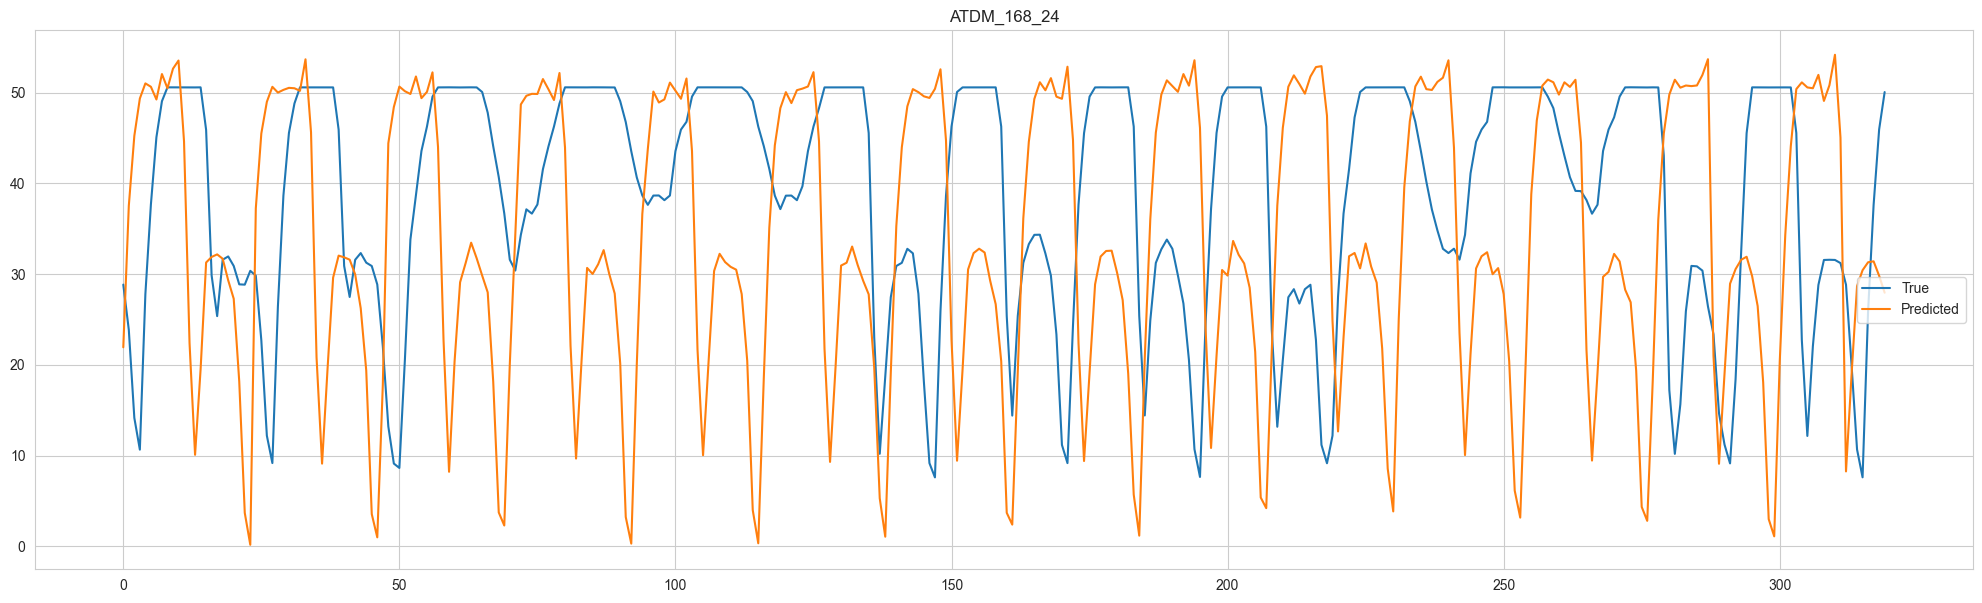

In [162]:
result_all_street(hours, speeds, speeds_pred, 'ATDM_168_24')

In [163]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month_work_hours.npz' # 15 h
pred_dataset_path = 'Experements/pred_new_dataset/ATDM_105_15/evaluate_cache/2023_12_14_06_50_06_ATDM_vo_sens_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
date = np.load(dataset_path)['arr_2']
week_day = np.load(dataset_path)['arr_3']

13.461406264454126


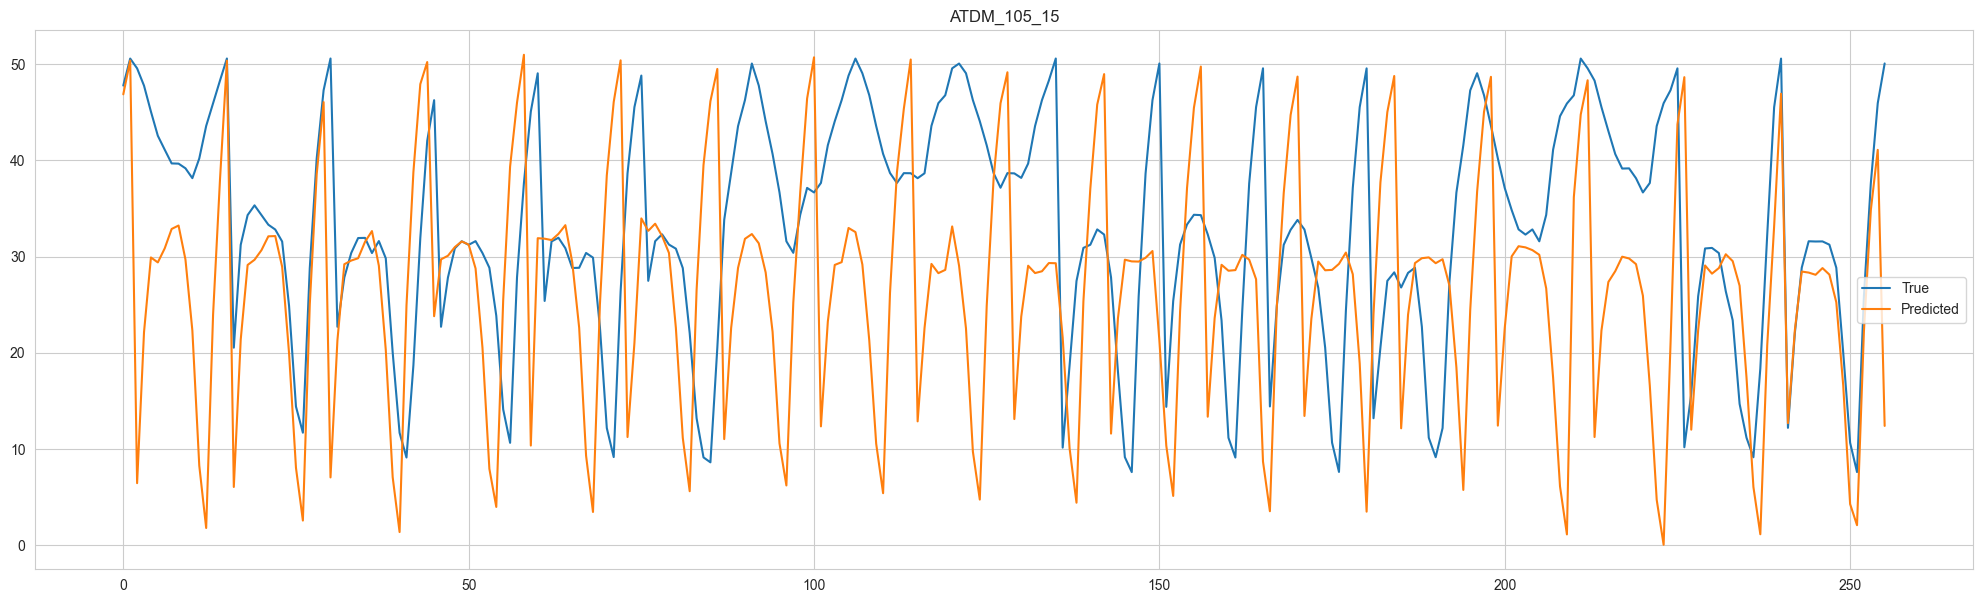

In [164]:
hours = 15
street = 1232
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'ATDM_105_15')

9.738421057661375


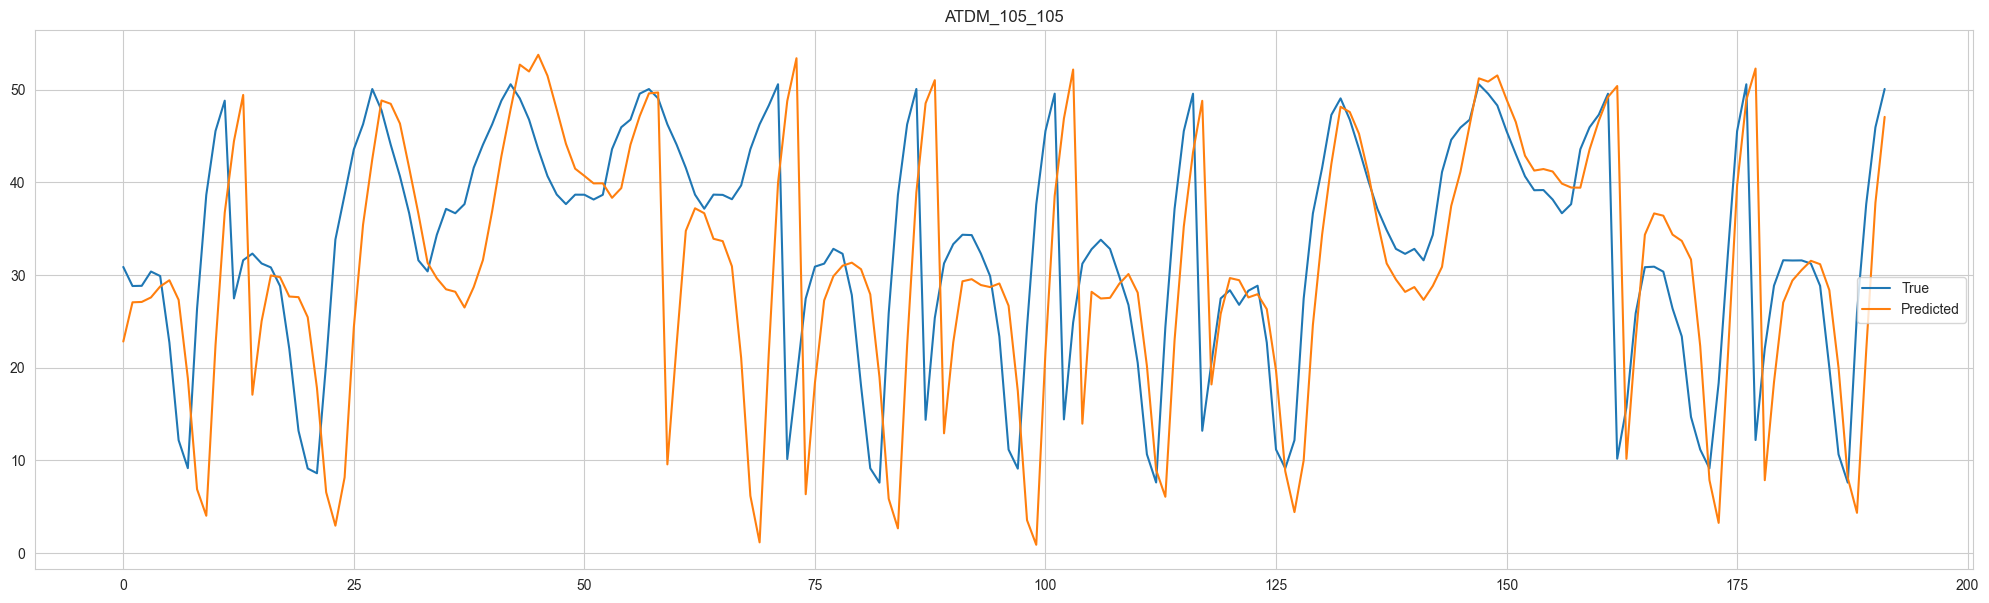

In [175]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month_work_hours.npz' # 15 h
pred_dataset_path = 'Experements/pred_new_dataset/ATDM_105_105/evaluate_cache/2023_12_14_09_03_24_ATDM_vo_sens_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 105
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'ATDM_105_105')

10.987555747561984


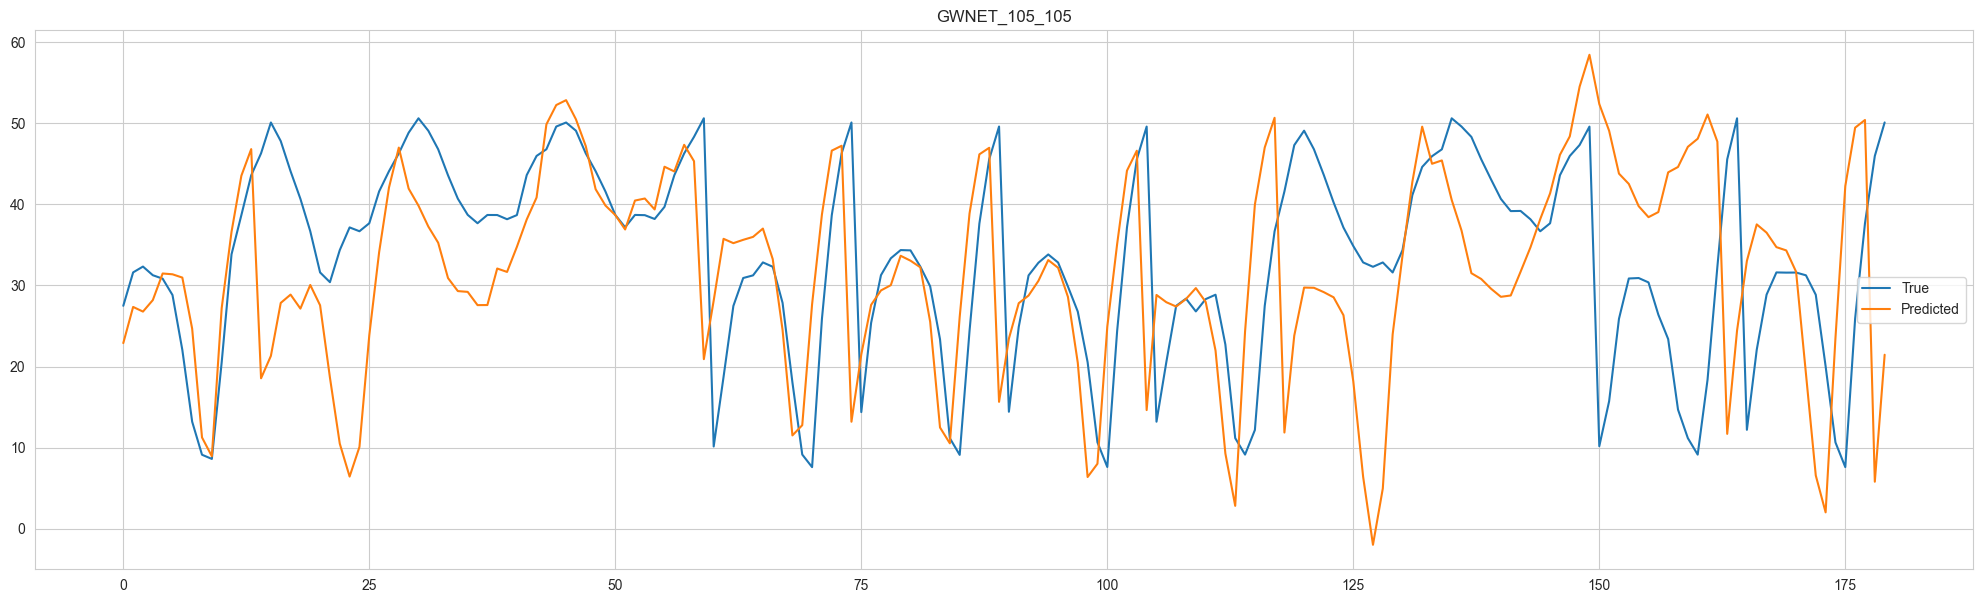

In [215]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month_work_hours.npz' # 15 h
pred_dataset_path = 'Experements/pred_new_dataset/GWNET_105_105/2023_12_18_09_03_35_GWNET_vo_sens_15_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 105
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'GWNET_105_105')

11.265393656776064


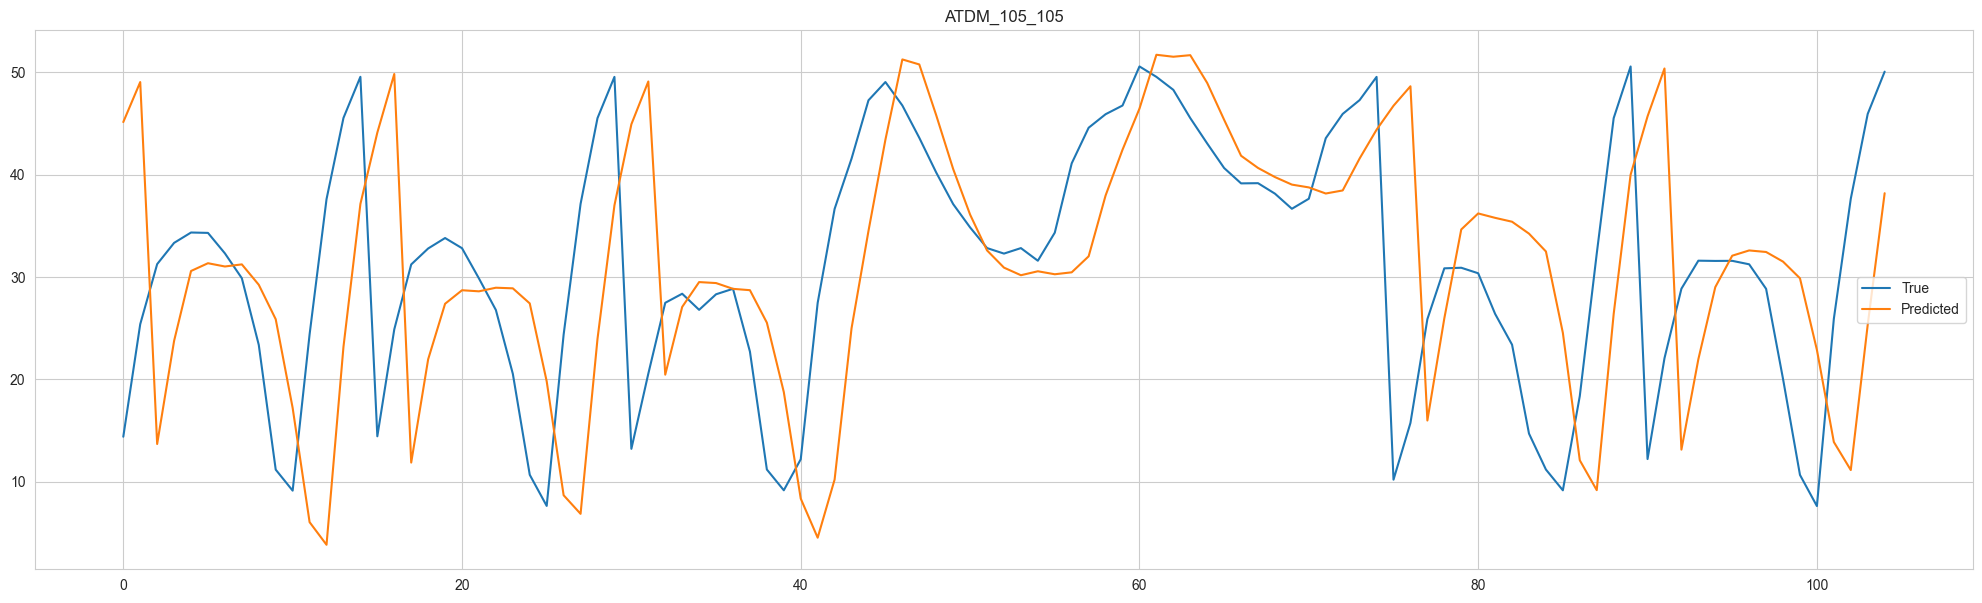

In [187]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month_work_hours.npz' # 15 h
pred_dataset_path = 'Experements/pred_new_dataset/ATDM_105_105/evaluate_cache/2023_12_14_09_03_24_ATDM_vo_sens_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 105
speeds_pred = speeds_pred[-105:]
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'ATDM_105_105')

10.190827101752872


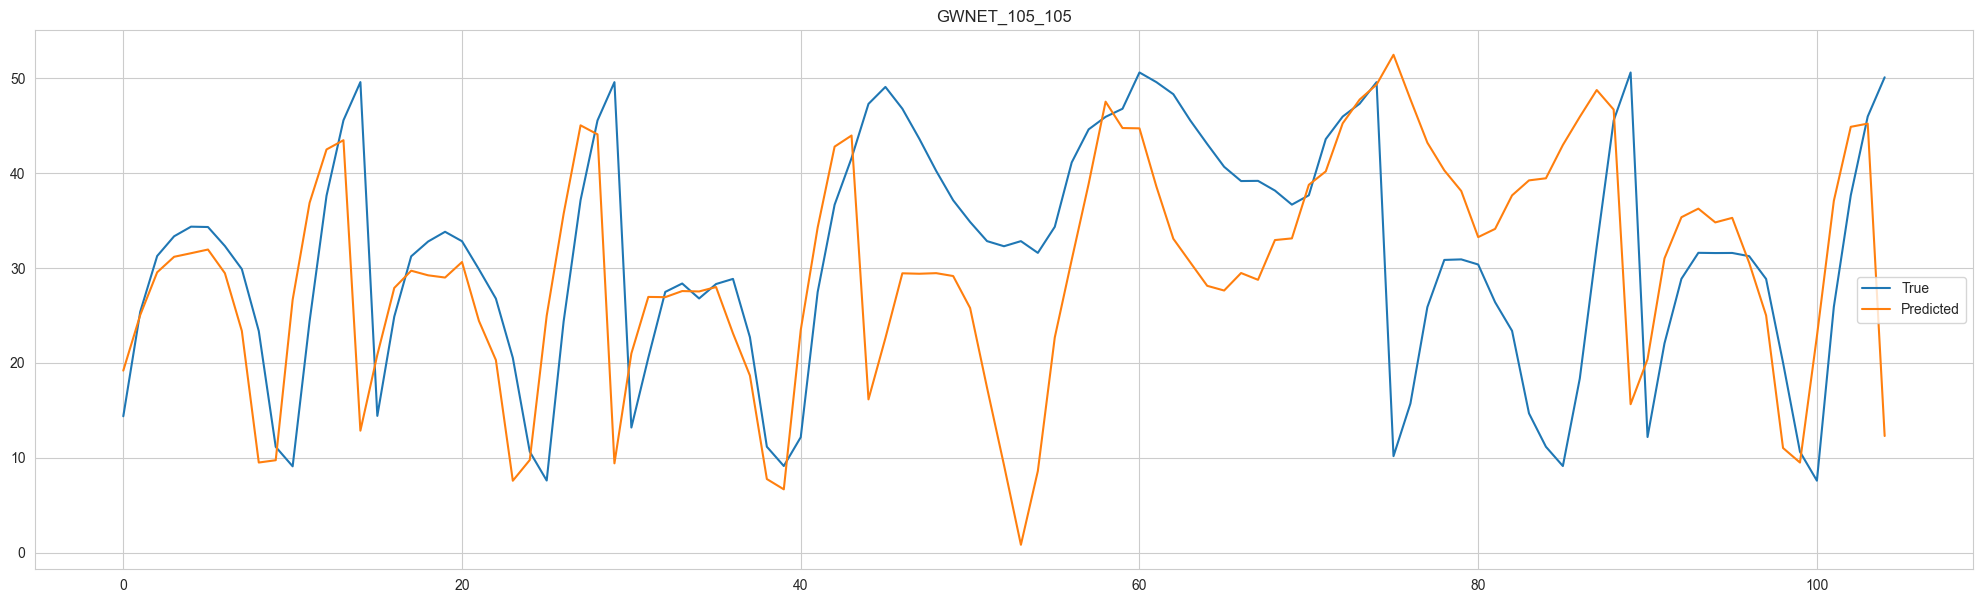

In [216]:
ataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month_work_hours.npz' # 15 h
pred_dataset_path = 'Experements/pred_new_dataset/GWNET_105_105/2023_12_18_09_03_35_GWNET_vo_sens_15_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 105
speeds_pred = speeds_pred[-105:]
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'GWNET_105_105')

17.622727694965544


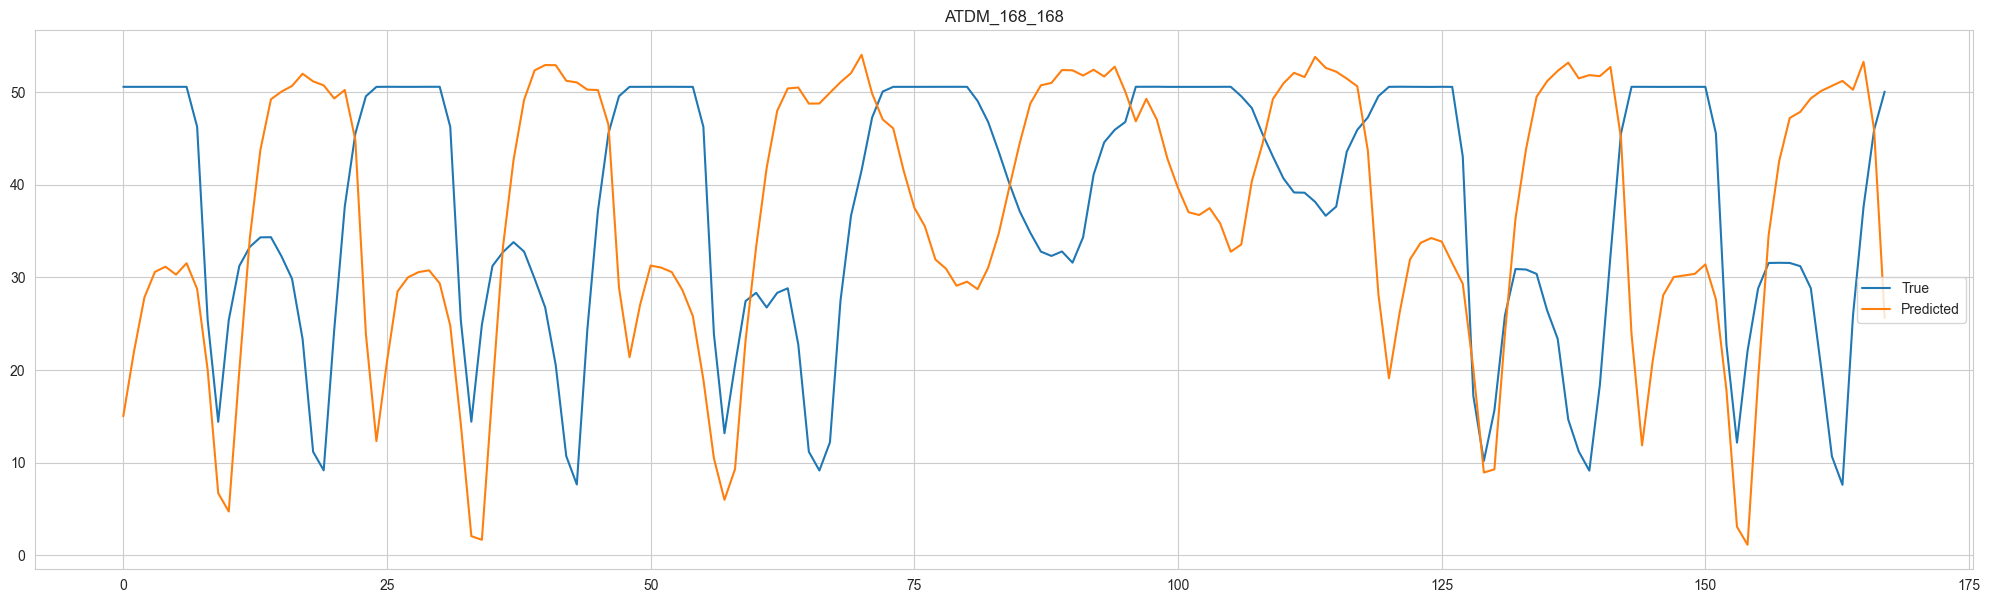

In [205]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11.npz' # 24 h
pred_dataset_path = 'Experements/pred_new_dataset/ATDM_168_168_MAE/2023_12_18_08_17_39_ATDM_vo_sens_24_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 168
speeds_pred = speeds_pred[-168:]
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'ATDM_168_168')

7.726031615620568


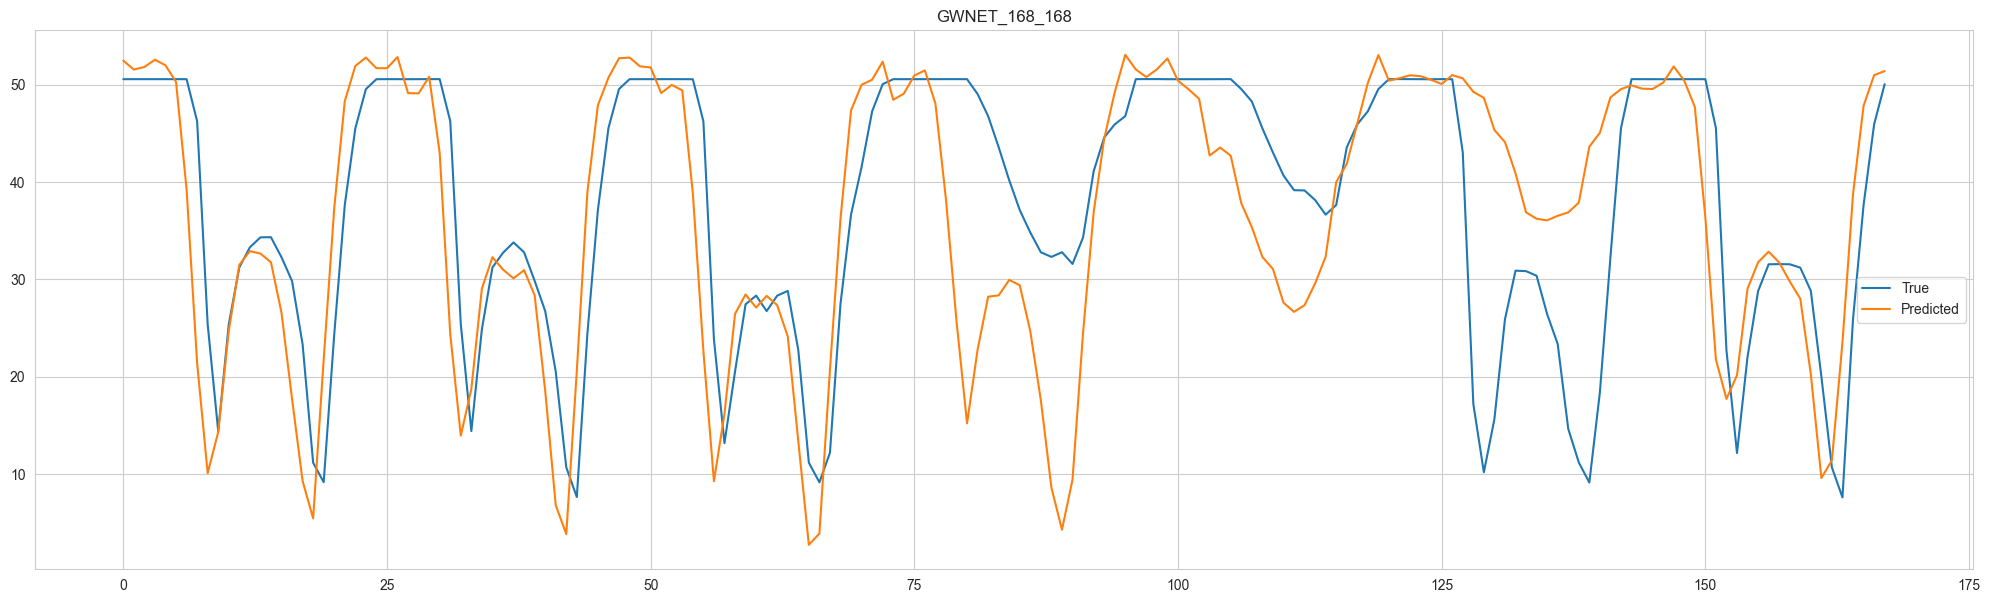

In [219]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11.npz' # 24 h
pred_dataset_path = 'Experements/pred_new_dataset/GWNET_168_168/2023_12_18_10_07_10_GWNET_vo_sens_24_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 168
speeds_pred = speeds_pred[-168:]
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'GWNET_168_168')

5.5721431857063655
105


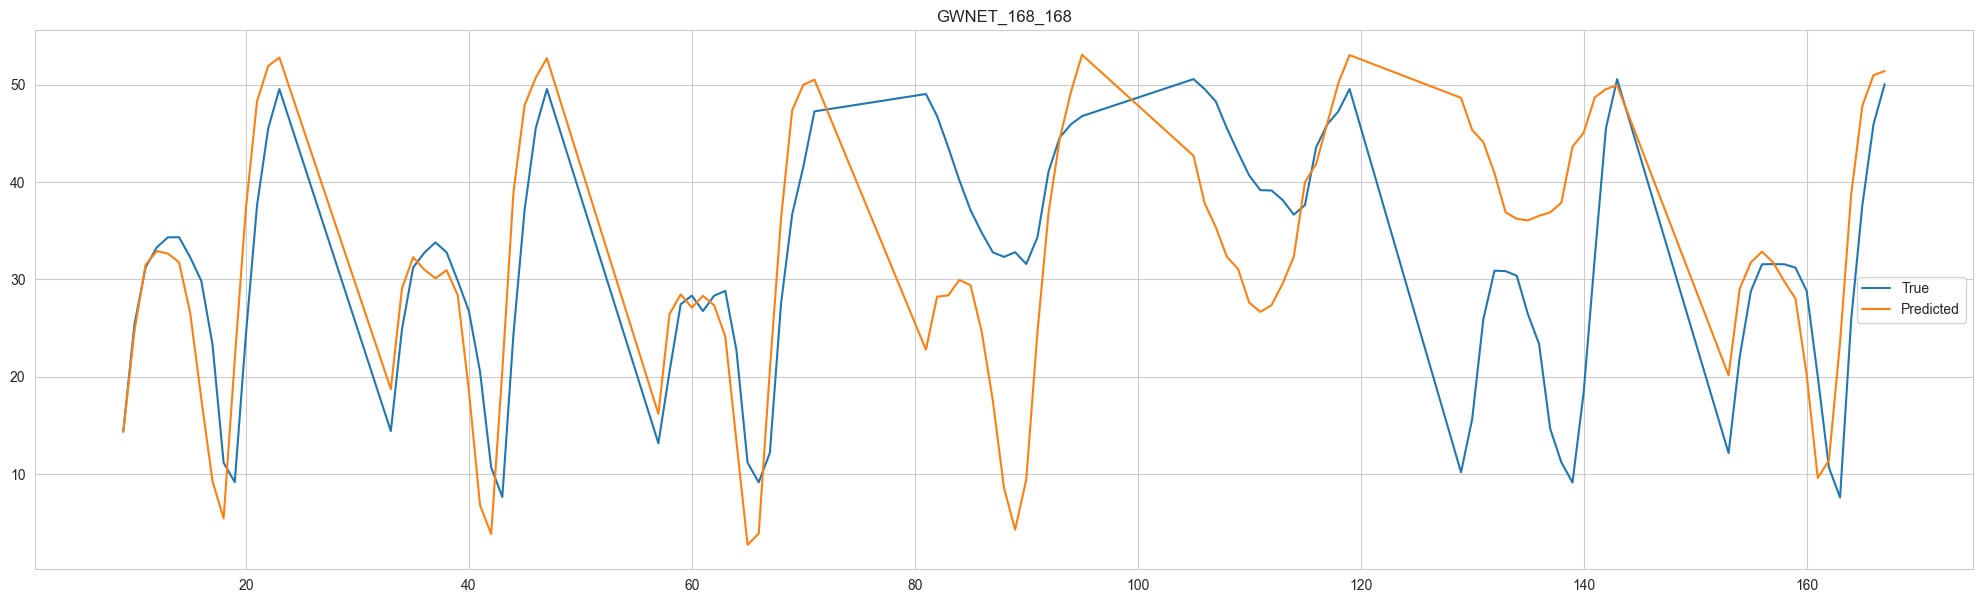

In [220]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11.npz' # 24 h
pred_dataset_path = 'Experements/pred_new_dataset/GWNET_168_168/2023_12_18_10_07_10_GWNET_vo_sens_24_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 168
speeds_pred = speeds_pred[-168:]
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street_vyres_15(hours, speeds, speeds_pred, 'GWNET_168_168')

8.148625839324225


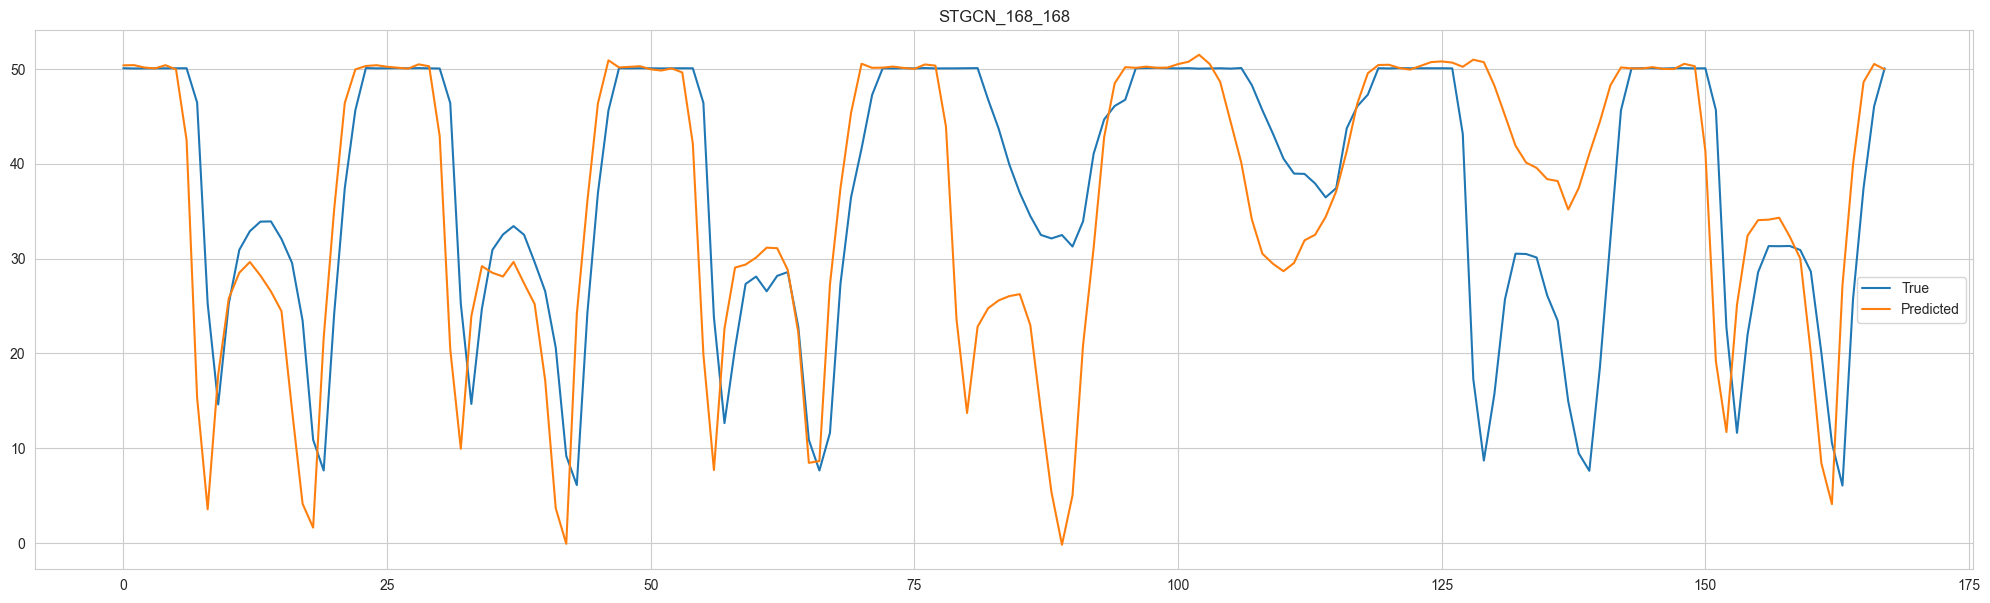

In [193]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month.npz' # 24 h OLD
pred_dataset_path = 'Experements/STGCN_H168_H168_29_11_2023/2023_11_29_05_12_51_STGCN_vo_sens_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 168
speeds_pred = speeds_pred[-168:]
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street(hours, speeds, speeds_pred, 'STGCN_168_168')

6.19430376802172
105


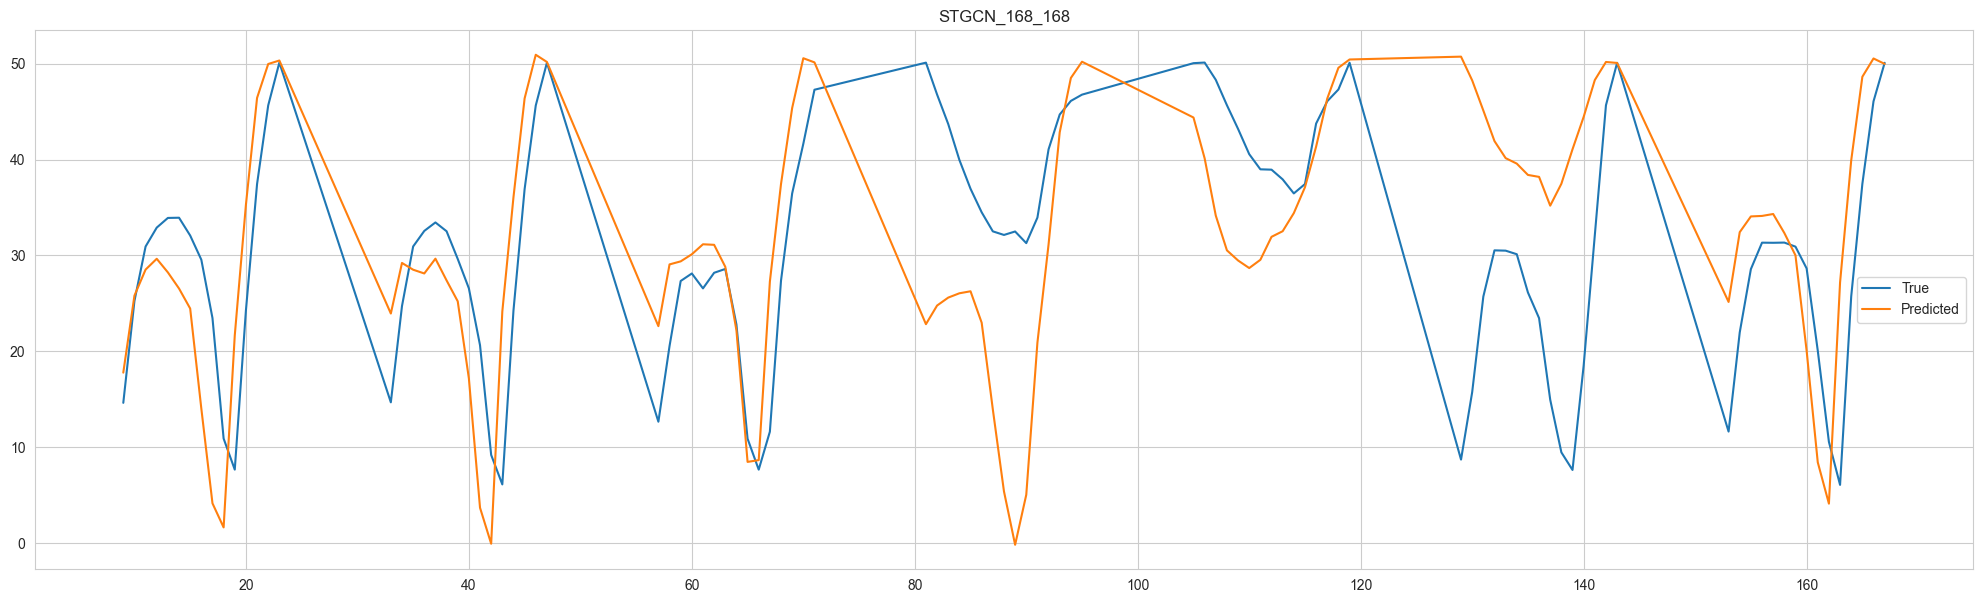

In [198]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month.npz' # 15 h
pred_dataset_path = 'Experements/STGCN_H168_H168_29_11_2023/2023_11_29_05_12_51_STGCN_vo_sens_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 168
speeds_pred = speeds_pred[-168:]
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street_vyres_15(hours, speeds, speeds_pred, 'STGCN_168_168')

7.609048556536436
157


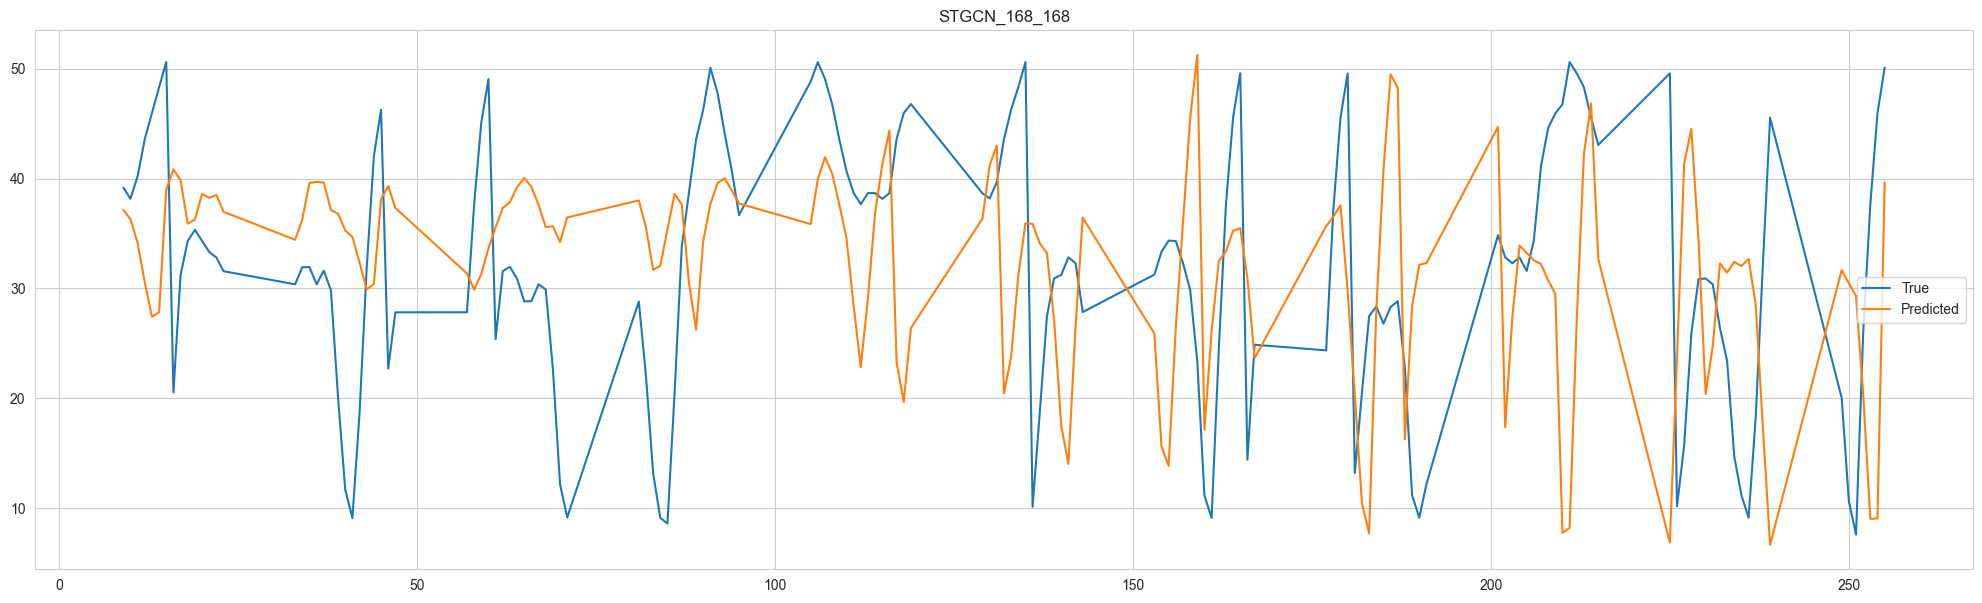

In [222]:
dataset_path = 'C:/Рабочий стол/ИДУ_Projects/traffic_9_10_11_month_work_hours.npz' # 15 h
pred_dataset_path = 'Experements/pred_new_dataset/GWNET_15_15_mape/2023_12_17_00_42_20_GWNET_vo_sens_15_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
time = np.load(dataset_path)['arr_1']
hours = 15
speeds = speeds[-len(speeds_pred):]
c = []
for i in range(len(speeds_pred)):
    c.append(i)
result_all_street_vyres_15(hours, speeds, speeds_pred, 'STGCN_168_168')

In [206]:
prediction_STGCN = []
pred_dataset_path = 'Experements/STGCN_H168_H168_29_11_2023/2023_11_29_05_12_51_STGCN_vo_sens_predictions.npz'
speeds_pred = np.load(pred_dataset_path)['prediction']
speeds_pred = speeds_pred[-168:]
for i in range(len(speeds_pred)):
        prediction_STGCN.append(speeds_pred[i//hours][i%hours])

In [211]:
for i in range(168):
    for j in range(1421):
        if prediction_STGCN[i][j]<0:
            prediction_STGCN[i][j] = prediction_STGCN[i][j] + 1

In [214]:
for i in range(168):
    for j in range(1421):
        if prediction_STGCN[i][j]<0:
            print(prediction_STGCN[i][j])

In [ ]:
prediction_ATDM = []
pred_dataset_path = 'Experements/pred_new_dataset/ATDM_105_105/evaluate_cache/2023_12_14_09_03_24_ATDM_vo_sens_predictions.npz'
speeds = np.load(dataset_path)['arr_0']
speeds_pred = np.load(pred_dataset_path)['prediction']
speeds_pred = speeds_pred[-45:]
for i in range(len(speeds_pred)):
        prediction_ATDM.append(speeds_pred[i//hours][i%hours])
np.savez('traffic_prediction_last_45_hours_ATDM', prediction_ATDM)

In [27]:
graph_sun_1830 = nx.read_graphml('graph_sun_1830.graphml')
graph_mon_1830 = nx.read_graphml('graph_mon_1830.graphml')
blocks = gpd.read_parquet('blocks_cutter_result.parquet')
weight_to_float(graph_sun_1830)
weight_to_float(graph_mon_1830)
matrix_sun_1830 = bn.preprocessing.DataGetter(blocks=blocks).get_accessibility_matrix(graph_sun_1830)
matrix_mon_1830 = bn.preprocessing.DataGetter(blocks=blocks).get_accessibility_matrix(graph_mon_1830)
matrix_sun_1830.df.mean(axis= 'index')

id
0       19.101920
1       19.101920
2       18.473412
3       19.101920
4       18.473412
          ...    
1349    14.025111
1350    16.307238
1351    15.266617
1352    17.504431
1353    16.889217
Length: 1354, dtype: float64

In [28]:
matrix_mon_1830.df.mean(axis= 'index')

id
0       19.101920
1       19.101920
2       18.473412
3       19.101920
4       18.473412
          ...    
1349    14.025111
1350    16.307238
1351    15.266617
1352    17.504431
1353    16.889217
Length: 1354, dtype: float64

In [4]:
G = ox.load_graphml("C:/Рабочий стол/Dataset_Traffic/drive.graphml")
data = load('traffic_9_10_month.npz')
lst = data.files
#for item in lst:
    #print(item)
    #print(data[item])   
speeds = data['arr_0']
time = data['arr_1']
date = data['arr_2']
weekday = data['arr_3']

In [5]:
len(speeds)

2736

In [5]:
n, e = ox.graph_to_gdfs(G)
e

osmid  oneway   lanes  \
u           v           key                                           
223631      763448262   0                 192137871    True       2   
763448262   3639158309  0                  60981084    True     NaN   
            1833317419  0    [763743931, 285257335]    True  [2, 3]   
3639158309  3639158308  0                 183951414    True       2   
            763448264   0                 359152338    True       1   
...                                             ...     ...     ...   
10212601282 10212601289 0                1116605703    True       2   
10212601283 10212601282 0                1116605701   False     NaN   
            10212601273 0                1116605704    True       2   
10212601289 10212601290 0                 605081846   False     NaN   
            10212601301 0                1116605703    True       2   

                                              name        highway  maxspeed  \
u           v           key                                                   
223631      763448262   0      набережная Макарова      secondary  RU:urban   
763448262   3639158309  0    Средний проспект В.О.    residential  RU:urban   
            1833317419  0      набережная Макарова      secondary  RU:urban   
3639158309  3639158308  0      набережная Макарова      secondary  RU:urban   
            763448264   0    Средний проспект В.О.    residential  RU:urban   
...                                            ...            ...       ...   
10212601282 10212601289 0     Железноводская улица       tertiary  RU:urban   
10212601283 10212601282 0                      NaN  tertiary_link       NaN   
            10212601273 0     Железноводская улица       tertiary  RU:urban   
10212601289 10212601290 0                      NaN  tertiary_link       NaN   
            10212601301 0     Железноводская улица       tertiary  RU:urban   

                            reversed   length                weight  \
u           v           key                                           
223631      763448262   0      False   21.732  0.052156799999999996   
763448262   3639158309  0      False    6.964             0.0167136   
            1833317419  0      False  242.279    0.5814695999999999   
3639158309  3639158308  0      False   22.209             0.0533016   
            763448264   0      False  125.523             0.3012552   
...                              ...      ...                   ...   
10212601282 10212601289 0      False   33.392             0.0801408   
10212601283 10212601282 0      False    5.980              0.014352   
            10212601273 0      False  104.325               0.25038   
10212601289 10212601290 0       True    5.897             0.0141528   
            10212601301 0      False  231.992             0.5567808   

                            transport_type  \
u           v           key                  
223631      763448262   0            drive   
763448262   3639158309  0            drive   
            1833317419  0            drive   
3639158309  3639158308  0            drive   
            763448264   0            drive   
...                                    ...   
10212601282 10212601289 0            drive   
10212601283 10212601282 0            drive   
            10212601273 0            drive   
10212601289 10212601290 0            drive   
            10212601301 0            drive   

                                                                      geometry  \
u           v           key                                                      
223631      763448262   0    LINESTRING (348611.657 6648539.634, 348592.303...   
763448262   3639158309  0    LINESTRING (348592.303 6648549.669, 348588.653...   
            1833317419  0    LINESTRING (348592.303 6648549.669, 348490.251...   
3639158309  3639158308  0    LINESTRING (348588.653 6648543.720, 348608.410...   
            763448264   0    LINESTRING (348588.653 6648543.720, 348582.420... 

In [26]:
datetime = 37+48*9
print(date[datetime])
print(time[datetime])
print(weekday[datetime])

10-09-2023
18:30
Sun


In [27]:
for i in range(len(e)):
    e['weight'].iloc[i] = e['length'].iloc[i]/((speeds[datetime][i])*(1000/60))
G1 = ox.graph_from_gdfs(n,e)
ox.save_graphml(G1, 'graph_sun_1830.graphml')

C:\Users\belko\AppData\Local\Temp\ipykernel_2672\1715757875.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  e['weight'].iloc[i] = e['length'].iloc[i]/((speeds[datetime][i])*(1000/60))


In [6]:
G_sun_1830 = ox.load_graphml('graph_sun_1830.graphml')
G_mon_1830 = ox.load_graphml('graph_mon_1830.graphml')
G_mon_0600 = ox.load_graphml('graph_mon_0600.graphml')

In [7]:
n1, e1 = ox.graph_to_gdfs(G_sun_1830)
n2, e2 = ox.graph_to_gdfs(G_mon_1830)
n3, e3 = ox.graph_to_gdfs(G_mon_0600)

In [8]:
n1
m = list(n1.index.get_level_values(0))
m

[223631,
 763448262,
 3639158309,
 1833317419,
 3639158308,
 763448264,
 1395097282,
 1833317421,
 223633,
 3639158302,
 6906567508,
 9705815309,
 6906567503,
 254980984,
 9705815312,
 308183,
 223634,
 308186,
 4147041629,
 26056566,
 26056564,
 3670418894,
 245940,
 223647,
 3660091441,
 3660091443,
 3660091444,
 3660091451,
 223648,
 254980947,
 1938742454,
 254980945,
 3670328123,
 230326,
 4094356195,
 327165,
 6443092492,
 230327,
 327171,
 1433592642,
 6443092157,
 2878859363,
 1848971141,
 21634021,
 1107611202,
 1433592639,
 306895,
 3283938200,
 230334,
 230335,
 3283938207,
 230336,
 21634025,
 3283938202,
 21634003,
 181864868,
 3692381624,
 21634023,
 181821838,
 306930,
 237693,
 3723904133,
 21743392,
 151031343,
 3723904132,
 3723904130,
 21743238,
 309105,
 21743394,
 151031089,
 3723904137,
 3723904129,
 3723904127,
 1892341868,
 21743242,
 3723904138,
 309101,
 270062082,
 2014678500,
 4493118685,
 3723902424,
 237695,
 3382178337,
 21743196,
 307090,
 3382178339,
 8

In [33]:
g = nx.read_graphml('graph_mon_0600.graphml')
g2 = nx.read_graphml('graph_mon_1830.graphml')

In [41]:
aggregated_blocks = gpd.read_parquet(os.path.join('blocks_cutter_result.parquet'))
getter = DataGetter(blocks=aggregated_blocks)
accessibility_matrix1 = getter.get_accessibility_matrix(g)
accessibility_matrix2 = getter.get_accessibility_matrix(g2)
accessibility_matrix1

AccessibilityMatrix(df=id    0     1     2     3     4     5     6     7     8     9     ...  1344  \
id                                                                ...         
0      0.0   0.0   2.0   0.0   2.0   2.0   1.0   1.0   1.0   0.0  ...  14.0   
1      0.0   0.0   2.0   0.0   2.0   2.0   1.0   1.0   1.0   0.0  ...  14.0   
2      2.0   2.0   0.0   2.0   0.0   0.0   3.0   3.0   3.0   2.0  ...  15.0   
3      0.0   0.0   2.0   0.0   2.0   2.0   1.0   1.0   1.0   0.0  ...  14.0   
4      2.0   2.0   0.0   2.0   0.0   0.0   3.0   3.0   3.0   2.0  ...  15.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
1349   9.0   9.0   9.0   9.0   9.0   9.0  10.0  10.0  10.0   9.0  ...  11.0   
1350  18.0  18.0  18.0  18.0  18.0  18.0  19.0  19.0  19.0  18.0  ...  15.0   
1351  17.0  17.0  17.0  17.0  17.0  17.0  18.0  18.0  18.0  17.0  ...  14.0   
1352  13.0  13.0  11.0  13.0  11.0  11.0  14.0  14.0  14.0  13.0  ...  18.0   
1353  13.0  13.0  11.0  13.0 